<a href="https://colab.research.google.com/github/MRS88/AI_course/blob/master/%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F_03_Pandas_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_1/Ultra_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Представим ситуацию. Вы заказали базу у фрилансеров. Им необходимо было скачать с сайтов двух отелей анонимную базу данных, о всех клиентах. Фрилансеры выполнили заказ и прислали работу. Как оказалось, исходные данные очень загрязнены (пустыми колонками, неинформативными строками и т.д), да еще и представлены в виде нескольких различных файлов. Главная задача на всё ДЗ - очистить базу и сохранить в виде одного документа.

Ссылка на файлы: 
https://drive.google.com/drive/folders/12aykvz02214Q_7eNMm3loXzOIDXfeZ4b?usp=sharing

Лучше сохранить на свой Google Диск

### Задание 1


Подключите Google Drive.

Откройте папку с файлами и сохраните каждый из них в виде Pandas DataFrame. 

**Подсказка 1**: получить список имен файлов можно при помощи библиотеки os, командой os.listdir(путькпапкесфайлами). 

**Подсказка 2**: для сохранения всех файлов в виде Pandas DataFrame удобно использовать одну из структур данных Python

Объедините все Pandas DataFrame в один.

**Решение:**

In [ ]:
import pandas as pd
import os

path = '/content/drive/My Drive/bookings/'
dirs = os.listdir(path)
data = pd.DataFrame()
for file in dirs:
  data = pd.concat([data, pd.read_csv(path + file)])

### Задание 2

Хорошо бы понимать с какими данными мы работаем. 

Узнайте размерность получившегося DataFrame (число столбцов и число строк).

Проверьте, выведя график, есть ли пропуски в данных. Оцените насколько их много.

**Решение:**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(238780, 37)



Unnamed: 0                             0
test_values                       238780
Unnamed: 2                        238780
for_notes                         238780
hotel                              59695
is_canceled                       179085
lead_time                         179085
arrival_date_year                 179085
arrival_date_month                179085
cashe                             238780
arrival_date_week_number          179085
arrival_date_day_of_month         179085
stays_in_weekend_nights           179085
stays_in_week_nights              179085
adults                            179085
children                          179087
babies                            179085
meal                              179085
country                           179329
market_segment                    179085
distribution_channel              179085
is_repeated_guest                 179085
previous_cancellations            179085
previous_bookings_not_canceled    179085
reserved_room_ty

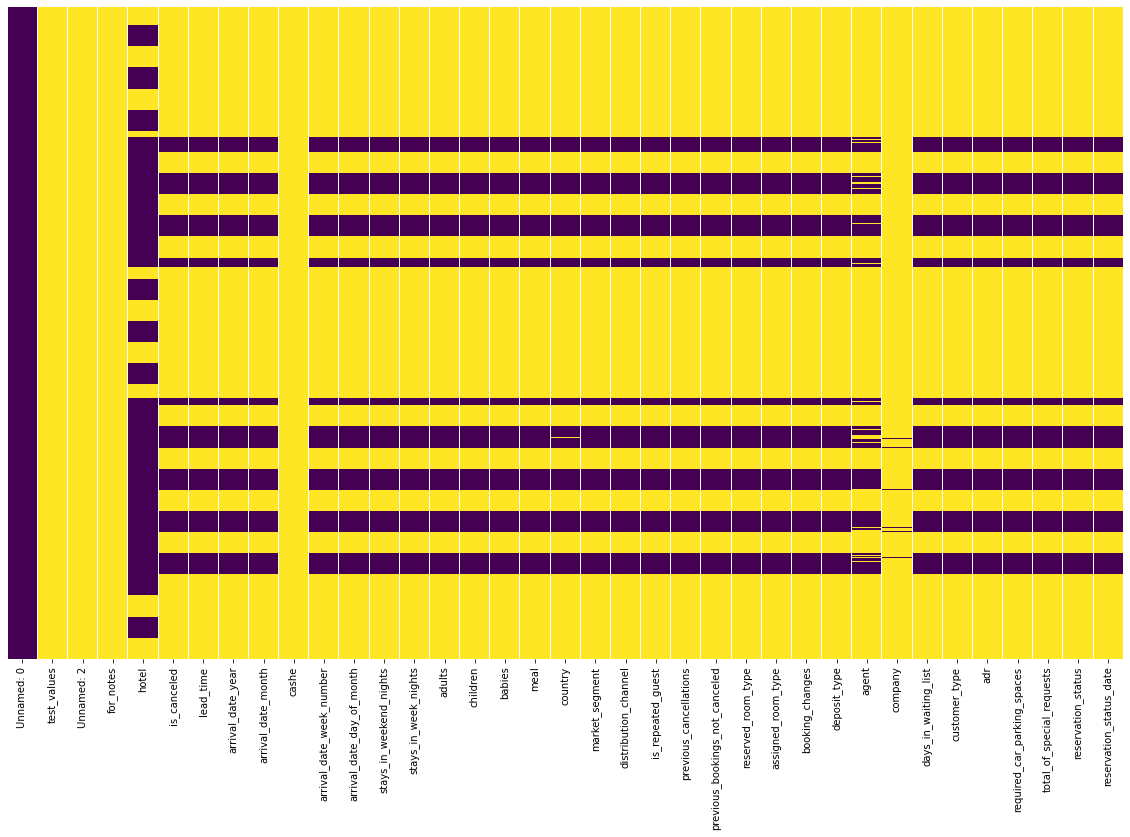

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.shape)

%matplotlib inline
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show
print()
data.isna().sum()


### Задание 3

Основываясь на выводах из предыдущего задания очистите данные от пропусков.

**Подсказка**: очевидно, что есть полностью пустые столбцы, неинформативные строки с одним лишь значением "For notes:", пустая часть датасета внизу. После этих преобразований могут остаться пустые значения в датасете с хаотичным расположением (Это допускается).

Если остались пропуски, заполните их словом "unknown"

**Решение:**

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(data[data.hotel == 'For notes:'].index)
data = data.dropna(axis=1, how='all')
data = data.dropna(axis=0, how='all')
print(data.shape)
data.fillna('unknown')


(59695, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,16.0,2016.0,April,18.0,29.0,2.0,5.0,2.0,0,0.0,HB,POL,Offline TA/TO,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,71,unknown,0.0,Transient-Party,65.10,0.0,0.0,Check-Out,2016-05-06
2,Resort Hotel,0.0,16.0,2016.0,April,18.0,29.0,2.0,5.0,2.0,0,0.0,BB,NLD,Offline TA/TO,TA/TO,0.0,0.0,0.0,A,C,0.0,No Deposit,71,unknown,0.0,Transient-Party,41.40,0.0,0.0,Check-Out,2016-05-06
4,Resort Hotel,0.0,99.0,2016.0,April,18.0,27.0,2.0,7.0,2.0,0,0.0,HB,NLD,Groups,TA/TO,0.0,0.0,0.0,A,I,9.0,No Deposit,95,unknown,0.0,Transient-Party,71.89,0.0,0.0,Check-Out,2016-05-06
6,Resort Hotel,0.0,0.0,2016.0,May,19.0,6.0,0.0,1.0,2.0,0,0.0,BB,NLD,Direct,TA/TO,1.0,0.0,0.0,A,A,0.0,No Deposit,unknown,unknown,0.0,Group,79.00,0.0,0.0,Check-Out,2016-05-07
8,Resort Hotel,0.0,104.0,2016.0,April,18.0,28.0,2.0,7.0,2.0,2,0.0,BB,CHE,Direct,Direct,0.0,0.0,0.0,G,G,0.0,No Deposit,250,unknown,0.0,Transient,99.22,1.0,1.0,Check-Out,2016-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23868,City Hotel,0.0,44.0,2017.0,August,35.0,31.0,1.0,3.0,2.0,0,0.0,SC,DEU,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,9,unknown,0.0,Transient,140.75,0.0,1.0,Check-Out,2017-09-04
23870,City Hotel,0.0,135.0,2017.0,August,35.0,30.0,2.0,4.0,3.0,0,0.0,BB,JPN,Online TA,TA/TO,0.0,0.0,0.0,G,G,0.0,No Deposit,7,unknown,0.0,Transient,209.00,0.0,0.0,Check-Out,2017-09-05
23872,City Hotel,0.0,21.0,2017.0,August,35.0,30.0,2.0,5.0,2.0,0,0.0,BB,BEL,Offline TA/TO,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,394,unknown,0.0,Transient,96.14,0.0,2.0,Check-Out,2017-09-06
23874,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,3.0,0,0.0,BB,FRA,Online TA,TA/TO,0.0,0.0,0.0,E,E,0.0,No Deposit,9,unknown,0.0,Transient,225.43,0.0,2.0,Check-Out,2017-09-07


### Задание 4

Необходимо посмотреть сколько всего записей есть в столбце 'lead_time' по каждому отелю, за каждый год и каждый месяц каждого года

**Подсказка**: примените метод groupby для столбцов 'hotel', 'arrival_date_year', 'arrival_date_month'

**Решение:**

In [ ]:
data_gb = data.groupby(['hotel', 'arrival_date_year', 'arrival_date_month']).count()
data_gb = data_gb['lead_time']
data_gb

hotel         arrival_date_year  arrival_date_month
City Hotel    2015.0             August                1235
                                 December               829
                                 July                   703
                                 November               617
                                 October               1696
                                 September             1767
              2016.0             April                 1781
                                 August                1689
                                 December              1242
                                 February              1179
                                 January                683
                                 July                  1560
                                 June                  1962
                                 March                 1529
                                 May                   1846
                                 November       

### Задание 5

Узнайте размерность получившегося DataFrame (число столбцов и число строк)

Сохраните получившийся DataFrame в одном файле

**Решение:**

In [ ]:
data_gb.shape

(52,)